<a href="https://colab.research.google.com/github/anniemajella/jenkins/blob/main/CNN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
batch_size=128
num_classes=10
epochs=10

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
x_train /=255
x_test /=255
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')

60000 train samples
10000 test samples


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train,num_classes)
y_test=to_categorical(y_test,num_classes)

label: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


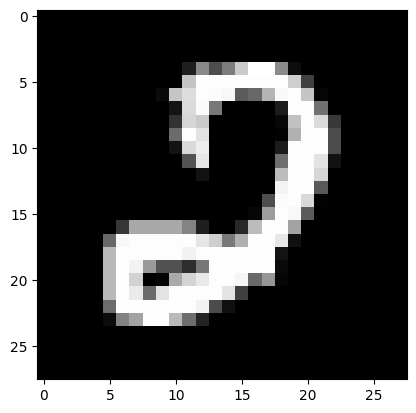

In [ ]:
import pylab as plt
print('label:',y_test[400:401])
plt.imshow(x_test[400:401].reshape(28,28),cmap='gray')
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(8, kernel_size = (3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        1168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 16)        0         
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 32)                73760     
                                                        

In [ ]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (x_test,y_test))

Epoch 1/10
469/469 [==============================] - 53s 110ms/step - loss: 0.6358 - accuracy: 0.7979 - val_loss: 0.1295 - val_accuracy: 0.9621
Epoch 2/10
469/469 [==============================] - 39s 83ms/step - loss: 0.3105 - accuracy: 0.9029 - val_loss: 0.0861 - val_accuracy: 0.9740
Epoch 3/10
469/469 [==============================] - 40s 86ms/step - loss: 0.2509 - accuracy: 0.9200 - val_loss: 0.0692 - val_accuracy: 0.9775
Epoch 4/10
469/469 [==============================] - 40s 85ms/step - loss: 0.2151 - accuracy: 0.9320 - val_loss: 0.0592 - val_accuracy: 0.9816
Epoch 5/10
469/469 [==============================] - 47s 101ms/step - loss: 0.1953 - accuracy: 0.9371 - val_loss: 0.0566 - val_accuracy: 0.9805
Epoch 6/10
469/469 [==============================] - 40s 86ms/step - loss: 0.1794 - accuracy: 0.9422 - val_loss: 0.0526 - val_accuracy: 0.9828
Epoch 7/10
469/469 [==============================] - 38s 82ms/step - loss: 0.1673 - accuracy: 0.9456 - val_loss: 0.0469 - val_accurac

In [ ]:
score = model.evaluate(x_test,y_test, verbose = 0)
print('Test Loss: ', score[0])
print('Test Accuracy: ', score[1])


Test Loss:  0.04511117935180664
Test Accuracy:  0.9855999946594238


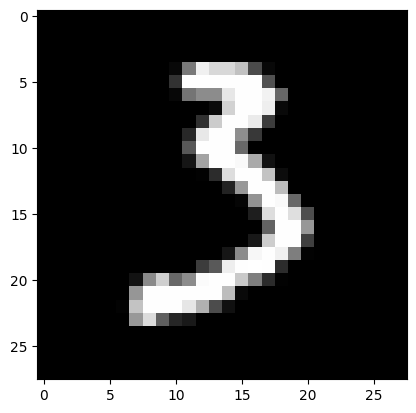

In [ ]:
import pylab as plt
plt.imshow(x_test[230:231].reshape(28,28), cmap= 'gray')
plt.show()


In [ ]:
import numpy as np
prediction = model.predict(x_test[230:231])
print('Prediction score:\n',prediction[0])
thresholded = (prediction > 0.5) * 1
print('\nThresholded score:\n',thresholded[0])
print('Predicted digit:\n',np.where(thresholded == 1)[1][0])

1/1 [==============================] - 0s 105ms/step
Prediction score:
 [1.0243889e-09 1.2782225e-06 2.5642671e-06 9.9780661e-01 7.3506441e-09
 2.0762079e-03 2.3648176e-06 1.2062894e-06 8.7007407e-05 2.2606444e-05]

Thresholded score:
 [0 0 0 1 0 0 0 0 0 0]
Predicted digit:
 3
